In [6]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Schechter1D
import astropy.units as u
from scipy.integrate import quad
from astropy.constants import L_bol0

## Hyper-Eddington accretion flows on to massive BHs
Kohei Inayoshi, Zoltán Haiman, Jeremiah P. Ostriker

[arXiv:1511.02116, Jul. 2016](https://arxiv.org/abs/1511.02116)

### Estimating the number of potentially observable hyper-Eddington accreting BHs from LAEs

Our Drake-like equation to estimate the number of observable hyper-Eddington accreting BHs could look like the following:

$$N_{obs}=n_\text{LAE} \times V_\text{comoving} \times f_\text{HEBH} \times f_\text{X-ray faint} \times \frac{t_\text{HE}}{t_\text{obs}}$$

#### Calculating LAE number density ($n_\text{LAE}$)

To calculate $n_\text{LAE}$, let's use the best fit Schechter parameters from [Konno et al. (2018)](https://arxiv.org/pdf/1705.01222), specifically the MC results for the luminosity function at $z=6.6$.

![image info](./konno2018table.png)

For accreting $\sim 10^{5-6}\  \text{M}_\odot$ in dense clouds ($n_{\infty}\sim 10^5 \  \text{cm}^{-3}$), $L_{\text{Ly}\alpha} \simeq 10^{42-44} \ \text{erg} \ \text{s}^{-1}$ (Inayoshi et al. 2016).

In [7]:
# compute characteristic magnitude from L^*
L_star = 1.3e43 * u.erg / u.s
M_star = -2.5 * np.log10((L_star / L_bol0).to(u.dimensionless_unscaled).value)

# compute magnitudes for LAE emitting BH luminosities
L_min = 1e42 * u.erg / u.s
L_max = 1e44 * u.erg / u.s

M_min = -2.5 * np.log10((L_min / L_bol0).to(u.dimensionless_unscaled).value)
M_max = -2.5 * np.log10((L_max / L_bol0).to(u.dimensionless_unscaled).value)

phi_star = 0.63e-4 * u.Mpc**-3
alpha = -2.5

# our Schechter/luminosity function
schechter = Schechter1D(phi_star=phi_star.value, m_star = M_star, alpha=alpha)

# integrate over luminosities
n_LAE, _ = quad(schechter, M_max, M_min) * u.Mpc**-3
print(f"Number density of detectable LAEs: {n_LAE}")

Number density of detectable LAEs: 0.0016458921058710616 1 / Mpc3


#### Calculating comoving volume for JWST

To find the comoving volume for a JWST observable source, let's first take the survey area of JADES (JWST's high-redshift survey). From [Eisenstein et al. (2023)](https://arxiv.org/abs/2306.02465), let's approximate a JADES survey area of $\approx 100 \ \text{arcmin}^2$.

We can get our comoving volume using [Ned Wright's Cosmo calculator](https://www.astro.ucla.edu/~wright/CosmoCalc.html). For $z=6.6$, let's do the comoving volume between $z=6.5-6.7$. For this we get $\Delta V = 7.235\times 10^{10} \ \text{Mpc}^3/ \text{steradian}$.

In [8]:
V_comoving = 7.235e10 * (u.Mpc**3/u.steradian)

JADES_a = 100 * u.arcmin**2

JADES_a_steradian = JADES_a.to(u.steradian)

V_JADES = V_comoving * JADES_a_steradian

print(f"Comoving volume of JADES: {V_JADES}")

Comoving volume of JADES: 612196.3978213434 Mpc3


#### Picking  $f_\text{HEBH}$ and $f_\text{X-ray faint}$ and our relevant timescales

We conservatively pick $f_\text{HEBH}\approx 0.01-0.1$ based on Inayoshi et al. (2016) and $f_\text{X-ray faint} \approx 0.75-0.9$ following [Malhotra et al. (2023)](https://arxiv.org/pdf/astro-ph/0301622).

Our timescale is $t_\text{HE}/t_\text{obs}$. From Inayoshi et al. (2016) we know our approximate timescale of steady hyper-Eddington accretion is $\approx 2 \times 10^{5} \ \text{yr}$ and given our redshift range $t_\text{obs}\approx 0.33 \times 10^{6} \ \text{yr}$.

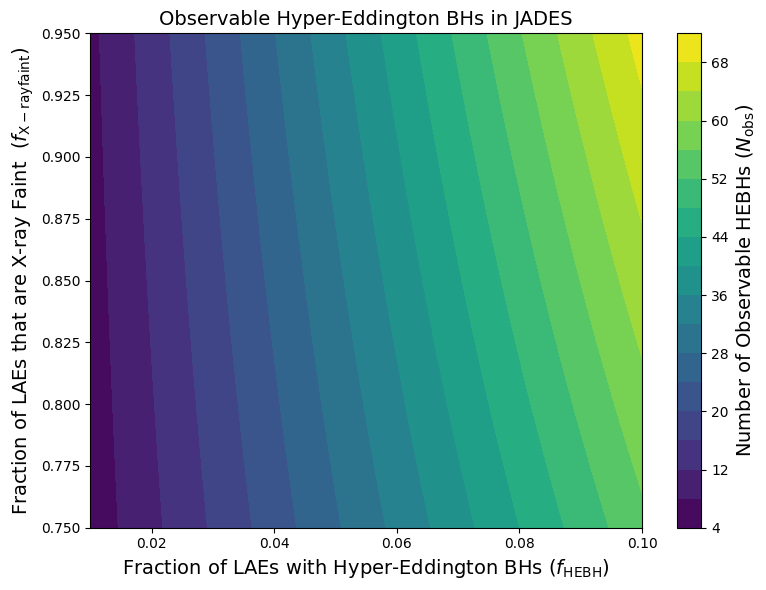

In [9]:
# timescales
t_HE = 2.4*1e5 * u.yr
t_obs =  0.33e6 * u.yr

# f_HEBH and f_Xrayfaint are our biggest uncertainties
f_HEBH_vals = np.linspace(0.01, 0.1, 100)
f_xray_faint_vals = np.linspace(0.75, 0.95, 100)

f_HEBH, f_XRAY = np.meshgrid(f_HEBH_vals, f_xray_faint_vals)

# our final Drake-like equation for N_obs
N_obs = n_LAE * V_JADES * f_HEBH * f_XRAY * (t_HE/t_obs)

plt.figure(figsize=(8, 6))
contour = plt.contourf(f_HEBH, f_XRAY, N_obs, levels=20, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label("Number of Observable HEBHs ($N_{\\rm obs}$)", fontsize=14)

plt.xlabel("Fraction of LAEs with Hyper-Eddington BHs ($f_{\\rm HEBH}$)", fontsize=14)
plt.ylabel("Fraction of LAEs that are X-ray Faint  ($f_{\\rm X-ray faint}$)", fontsize=14)
plt.title("Observable Hyper-Eddington BHs in JADES", fontsize=14)
plt.tight_layout()
plt.show()
